**Kelompok 5**
1.   Erliandika Syahputra
2.   Juanda Alra Baye

Kasus :Prediksi Konsumsi energi listrik di US

In [ ]:
# install library kaggle
!pip install -q kaggle

In [ ]:
# upload kaggle.json yang sudah di download
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"erliandikasyahputra","key":"7e93cec898e651ea8cc41bc870e51bc4"}'}

In [ ]:
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
# download dataset
!kaggle datasets download -d robikscube/hourly-energy-consumption

Dataset URL: https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption
License(s): CC0-1.0
  0% 0.00/11.4M [00:00<?, ?B/s]
100% 11.4M/11.4M [00:00<00:00, 850MB/s]


In [ ]:
# ekstrak dataset
!unzip -o hourly-energy-consumption.zip -d /content/hourly-energy-consumption

Archive:  hourly-energy-consumption.zip
  inflating: /content/hourly-energy-consumption/AEP_hourly.csv  
  inflating: /content/hourly-energy-consumption/COMED_hourly.csv  
  inflating: /content/hourly-energy-consumption/DAYTON_hourly.csv  
  inflating: /content/hourly-energy-consumption/DEOK_hourly.csv  
  inflating: /content/hourly-energy-consumption/DOM_hourly.csv  
  inflating: /content/hourly-energy-consumption/DUQ_hourly.csv  
  inflating: /content/hourly-energy-consumption/EKPC_hourly.csv  
  inflating: /content/hourly-energy-consumption/FE_hourly.csv  
  inflating: /content/hourly-energy-consumption/NI_hourly.csv  
  inflating: /content/hourly-energy-consumption/PJME_hourly.csv  
  inflating: /content/hourly-energy-consumption/PJMW_hourly.csv  
  inflating: /content/hourly-energy-consumption/PJM_Load_hourly.csv  
  inflating: /content/hourly-energy-consumption/est_hourly.paruqet  
  inflating: /content/hourly-energy-consumption/pjm_hourly_est.csv  


In [ ]:
# import dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
df = pd.read_csv('/content/hourly-energy-consumption/AEP_hourly.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Cek missing values
print(df.isnull().sum())

# Forward fill jika ada missing
df.fillna(method='ffill', inplace=True)



Datetime    0
AEP_MW      0
dtype: int64


<ipython-input-27-fb0da0dea7b7>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data)-look_back-1):
        X.append(data[i:(i+look_back), 0])
        y.append(data[i+look_back, 0])
    return np.array(X), np.array(y)

LOOK_BACK = 24  # Gunakan 24 jam sebelumnya
X, y = create_dataset(scaled_data, LOOK_BACK)

# Tambahkan dimensi untuk input LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))  # [samples, time steps, features]

In [ ]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
data = df.drop_duplicates()
data.duplicated().sum()

np.int64(0)

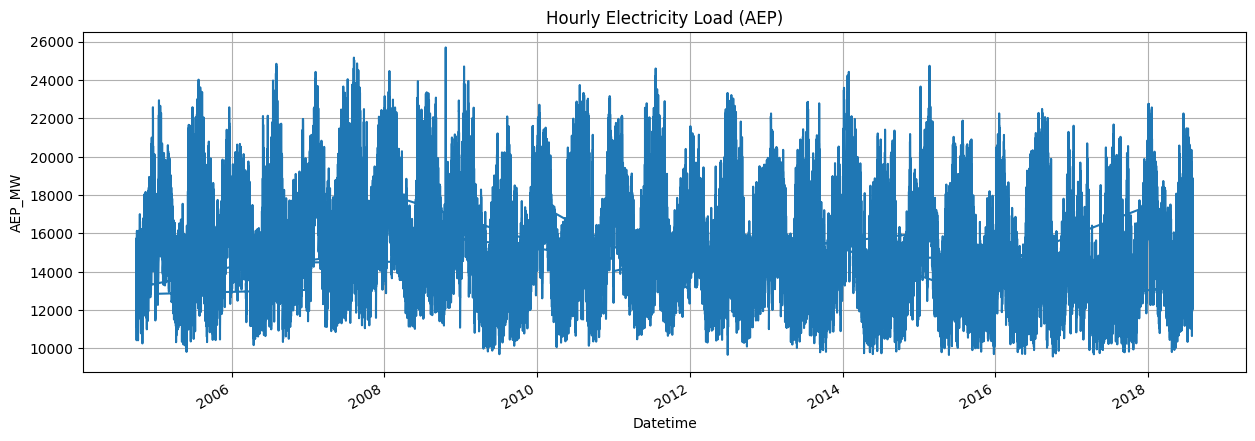

In [ ]:
import matplotlib.pyplot as plt

df['AEP_MW'].plot(figsize=(15, 5), title='Hourly Electricity Load (AEP)')
plt.xlabel('Datetime')
plt.ylabel('AEP_MW')
plt.grid()
plt.show()


In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(LOOK_BACK, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
history_lstm = model_lstm.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0, callbacks=[EarlyStopping(patience=5)])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


KeyboardInterrupt: 

In [ ]:
import numpy as np

def create_sequences(data, n_steps=24):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, n_steps=24)

# Bentuk input untuk LSTM: [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)


In [ ]:
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data)-look_back-1):
        X.append(data[i:(i+look_back), 0])
        y.append(data[i+look_back, 0])
    return np.array(X), np.array(y)

LOOK_BACK = 24  # Gunakan 24 jam sebelumnya
X, y = create_dataset(scaled_data, LOOK_BACK)

# Tambahkan dimensi untuk input LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))  # [samples, time steps, features]

In [ ]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(LOOK_BACK, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
history_lstm = model_lstm.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0, callbacks=[EarlyStopping(patience=5)])

NameError: name 'Sequential' is not defined

In [ ]:
# Ubah teks menjadi lowercase
undercase = df.copy()
undercase['lowercase'] = undercase['Message'].apply(lower)
undercase = undercase.drop(columns='Message')
undercase.tail(10)

,Category,label,lowercase
5562,ham,0,ok lor... sony ericsson salesman... i ask shuh...
5563,ham,0,ard 6 like dat lor.
5564,ham,0,why don't you wait 'til at least wednesday to ...
5565,ham,0,huh y lei...
5566,spam,1,reminder from o2: to get 2.50 pounds free call...
5567,spam,1,this is the 2nd time we have tried 2 contact u...
5568,ham,0,will ü b going to esplanade fr home?
5569,ham,0,"pity, * was in mood for that. so...any other s..."
5570,ham,0,the guy did some bitching but i acted like i'd...
5571,ham,0,rofl. its true to its name


In [ ]:
kamus = pd.read_csv('/content/spam-text-message-classification/SPAM text message 20170820 - Data.csv')
# Check if '_id' column exists before dropping
if '_id' in kamus.columns:
  kamus.drop(columns='_id', inplace=True)
kamus.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Buat dictionary dari kamus slang
slang_dict = pd.Series(kamus['Message'].values, index=kamus['Category']).to_dict()
# Fungsi untuk menggantikan kata slang dengan kata formal
def replace_slang(text, slang_dict):
    words = text.split() # Indent this line
    replaced_text = ' '.join([slang_dict.get(word, word) for word in words]) # Indent this line
    return replaced_text # Indent this line

In [ ]:
normalisasi = undercase.copy()
# Replace 'Text_Lower' with 'youtube_Lower' to access the correct column
normalisasi['Text_Formal'] = normalisasi['youtube_Lower'].apply(lambda x: replace_slang(x, slang_dict))
normalisasi = normalisasi.drop(columns='youtube_Lower')  # Drop the original 'youtube_Lower' column
normalisasi.tail(10)

,Sentiment,label,Text_Formal
18398,positive,1,i am currently enrolled in a msc machine learn...
18399,positive,1,i came for a machine learning related talk but...
18400,positive,1,ive worked for about 2 years with mlcomputer v...
18401,positive,1,i come from a physics background and usually w...
18402,neutral,1,back when i was learning to code i didn’t know...
18403,positive,1,i really like the point about engineering tool...
18404,positive,1,i’ve just started exploring this field and thi...
18405,neutral,1,excelente video con una pregunta filosófica pr...
18406,positive,1,hey daniel just discovered your channel a coup...
18407,positive,1,this is great focus is key a playful approach ...


In [ ]:
# Copy data dari undercase tadi
cleaning = undercase.copy()
# Apply cleaning
cleaning['Text_Cleaning'] = cleaning['lowercase'].apply(remove_emoji).apply(clean_text)
# Hapus kolom lama
cleaning = cleaning.drop(columns='lowercase')
cleaning.tail(5)

,Category,label,Text_Cleaning
5567,spam,1,this is the nd time we have tried contact u...
5568,ham,0,will u b going to esplanade fr home
5569,ham,0,pity was in mood for that so any other s...
5570,ham,0,the guy did some bitching but i acted like i d...
5571,ham,0,rofl its true to its name


In [ ]:
# Daftar singkatan yang umum muncul dalam pesan teks (bisa diperluas sesuai kebutuhan)
singkatan_dataset = {
    'u', 'ur', 'lor', 'lar', 'wif', 'oni', 'msg', 'pls', 'plz', 'txt', 'b4', 'nite',
    'cya', 'luv', 'ya', 'tmr', 'gr8', 'l8r', 'dun', 'wan', 'oso', 'lah', 'leh',
    'noe', 'r', 'n', 'bt', 'thk', 'okie', 'ya', 'yaar', 'meh', 'yo', 'hv', 'ttyl',
    'haha', 'omg', 'lol', 'rofl'
}

# Fungsi menghapus singkatan
def remove_abbreviations(text):
    words = text.split()
    cleaned_words = [word for word in words if word.lower() not in singkatan_dataset]
    return ' '.join(cleaned_words)

# Terapkan ke dataset
df_clean = cleaning.copy()
df_clean['Cleaned_Message'] = cleaning['Text_Cleaning'].apply(remove_abbreviations)
cleaning_lanjut = df_clean[['Category', 'Cleaned_Message']].copy()

# Tampilkan hasil
# df_clean[['Text_Cleaning', 'Cleaned_Message']].head()
cleaning_lanjut.head()

,Category,Cleaned_Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok joking
2,spam,free entry in a wkly comp to win fa cup final ...
3,ham,say so early hor c already then say
4,ham,nah i don t think he goes to usf he lives arou...


In [ ]:
# Tokenizing
def tokenize(d):
    return word_tokenize(d)

# Implementasi tokenizing
tokenizing = cleaning_lanjut.copy()
tokenizing['Text_Tokenize'] = tokenizing['Cleaned_Message'].apply(tokenize)
tokenizing.drop(columns='Cleaned_Message', inplace=True)
tokenizing.head()

,Category,Text_Tokenize
0,ham,"[go, until, jurong, point, crazy, available, o..."
1,ham,"[ok, joking]"
2,spam,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,ham,"[say, so, early, hor, c, already, then, say]"
4,ham,"[nah, i, don, t, think, he, goes, to, usf, he,..."


In [ ]:
# Remove stopword/Filtering
def remove_stopwords(text):
    filtered_words = [word for word in text if word not in stopwords.words('english')]
    return filtered_words

# Implementasi remove stopword
filtering = tokenizing.copy()
filtering['Remove_Stopword'] = filtering['Text_Tokenize'].apply(remove_stopwords)
filtering.drop(columns='Text_Tokenize', inplace=True)
filtering.head()

,Category,Remove_Stopword
0,ham,"[go, jurong, point, crazy, available, bugis, g..."
1,ham,"[ok, joking]"
2,spam,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,"[say, early, hor, c, already, say]"
4,ham,"[nah, think, goes, usf, lives, around, though]"


In [ ]:
# Install liblary sastrawi
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


In [ ]:
from nltk.stem import PorterStemmer

# Buat stemmer Porter untuk bahasa Inggris
stemmer = PorterStemmer()

# Buat cache kosong
stem_cache = {}

def stemming_with_cache(text):
    result = []
    for word in text:
        if word not in stem_cache:
            stem_cache[word] = stemmer.stem(word)
        result.append(stem_cache[word])
    return result

In [ ]:
# Salin DataFrame untuk hasil stemming
stemming_result = filtering.copy()

# Terapkan fungsi stemming_with_cache pada kolom Remove_Stopword
stemming_result['Stemming'] = stemming_result['Remove_Stopword'].apply(stemming_with_cache)

# Hapus kolom 'Remove_Stopword' setelah proses stemming
stemming_result.drop(columns='Remove_Stopword', inplace=True)

# Menampilkan hasil awal
stemming_result.head()

,Category,Stemming
0,ham,"[go, jurong, point, crazi, avail, bugi, great,..."
1,ham,"[ok, joke]"
2,spam,"[free, entri, wkli, comp, win, fa, cup, final,..."
3,ham,"[say, earli, hor, c, alreadi, say]"
4,ham,"[nah, think, goe, usf, live, around, though]"


In [ ]:
# Menggabungkan kata menjadi kalimat
text = []
for i in range(len(stemming_result['Stemming'])):
  text.insert(i, ' '.join(stemming_result['Stemming'][i]))

In [ ]:
# Proses dan hasil ubah kata menjadi kalimat
data_text = stemming_result.drop(columns='Stemming')
data_text['Text'] = text
data_text.head()

,Category,Text
0,ham,go jurong point crazi avail bugi great world l...
1,ham,ok joke
2,spam,free entri wkli comp win fa cup final tkt st m...
3,ham,say earli hor c alreadi say
4,ham,nah think goe usf live around though


In [ ]:
data_labeling = data_text.copy()
data_labeling['Category'] = data_labeling['Category'].map({'spam': 1, 'ham': 0})
data_labeling = data_labeling.rename(columns={'Category':'Label'})
data_labeling

,Label,Text
0,0,go jurong point crazi avail bugi great world l...
1,0,ok joke
2,1,free entri wkli comp win fa cup final tkt st m...
3,0,say earli hor c alreadi say
4,0,nah think goe usf live around though
...,...,...
5567,1,nd time tri contact ps pound prize claim easi ...
5568,0,b go esplanad fr home
5569,0,piti mood suggest
5570,0,guy bitch act like interest buy someth els nex...


In [ ]:
data_labeling['Label'].value_counts()

,count
Label,
0,4825
1,747


In [ ]:
# # Melakukan label encoder
# from sklearn import preprocessing

# lb = preprocessing.LabelEncoder()
# data_labeling['Label'] = lb.fit_transform(data_labeling['Sentiment'])
# data_labeling.head()

In [ ]:
X = data_labeling['Text'].values
y = data_labeling['Label']

In [ ]:
from sklearn.model_selection import train_test_split

# Bagi dataset menjadi data pelatihan (70%) dan data sisa (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Bagi data sisa menjadi data testing (70%) dan data validation (30%)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
print(f'Jumlah data training: {len(X_train)}')
print(f'Jumlah data testing: {len(X_test)}')
print(f'Jumlah data validation: {len(X_val)}')

Jumlah data training: 3900
Jumlah data testing: 836
Jumlah data validation: 836


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Inisialisasi objek Tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token='[UNK]')  # MAX_NUM_WORDS adalah jumlah kata unik yang akan digunakan

# Fitting Tokenizer pada teks pelatihan
tokenizer.fit_on_texts(X)

# Mengonversi teks ke token numerik dan melakukan padding
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_val_seq = tokenizer.texts_to_sequences(X_val)

# Melakukan padding sequence
X_train_padded = pad_sequences(X_train_seq)  # maxlen=MAX_SEQUENCE_LENGTH adalah panjang maksimal sekuens yang diizinkan
X_test_padded = pad_sequences(X_test_seq)
X_val_padded = pad_sequences(X_val_seq)

In [ ]:
X_train[40]

'could starv lose pound end day'

In [ ]:
X_train_padded[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0, 1022,   54,  240], dtype=int32)

In [ ]:
tokenizer.index_word

{1: '[UNK]',
 2: 'call',
 3: 'go',
 4: 'get',
 5: 'come',
 6: 'ps',
 7: 'ok',
 8: 'day',
 9: 'free',
 10: 'know',
 11: 'love',
 12: 'like',
 13: 'time',
 14: 'got',
 15: 'want',
 16: 'good',
 17: 'text',
 18: 'send',
 19: 'need',
 20: 'one',
 21: 'today',
 22: 'p',
 23: 'take',
 24: 'see',
 25: 'stop',
 26: 'home',
 27: 'think',
 28: 'repli',
 29: 'k',
 30: 'sorri',
 31: 'still',
 32: 'tell',
 33: 'mobil',
 34: 'back',
 35: 'da',
 36: 'dont',
 37: 'make',
 38: 'phone',
 39: 'pleas',
 40: 'say',
 41: 'hi',
 42: 'week',
 43: 'work',
 44: 'new',
 45: 'later',
 46: 'miss',
 47: 'hope',
 48: 'ask',
 49: 'min',
 50: 'meet',
 51: 'c',
 52: 'co',
 53: 'messag',
 54: 'night',
 55: 'dear',
 56: 'wait',
 57: 'happi',
 58: 'well',
 59: 'give',
 60: 'tri',
 61: 'thing',
 62: 'great',
 63: 'much',
 64: 'oh',
 65: 'wat',
 66: 'claim',
 67: 'hey',
 68: 'number',
 69: 'na',
 70: 'friend',
 71: 'thank',
 72: 'b',
 73: 'ye',
 74: 'way',
 75: 'e',
 76: 'let',
 77: 'prize',
 78: 'feel',
 79: 'even',
 80: '

In [ ]:
# Membuat arsitektur model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=50))
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=5,
    mode="auto",
    verbose=1,
    baseline=None,
    restore_best_weights=True
)

checkpoint_path = 'model_checkpoints/best_model.weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [ ]:
op = tf.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=op, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_padded, y_train,
                    validation_data=(X_val_padded, y_val),
                    epochs=20, batch_size=128,
                    callbacks=[checkpoint, early_stop])

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 798ms/step - accuracy: 0.8555 - loss: 0.4332
Epoch 1: val_loss improved from inf to 0.19421, saving model to model_checkpoints/best_model.weights.h5
31/31 ━━━━━━━━━━━━━━━━━━━━ 36s 870ms/step - accuracy: 0.8563 - loss: 0.4299 - val_accuracy: 0.9426 - val_loss: 0.1942
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9679 - loss: 0.1279
Epoch 2: val_loss improved from 0.19421 to 0.05192, saving model to model_checkpoints/best_model.weights.h5
31/31 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.9681 - loss: 0.1269 - val_accuracy: 0.9868 - val_loss: 0.0519
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 827ms/step - accuracy: 0.9852 - loss: 0.0496
Epoch 3: val_loss did not improve from 0.05192
31/31 ━━━━━━━━━━━━━━━━━━━━ 35s 871ms/step - accuracy: 0.9852 - loss: 0.0495 - val_accuracy: 0.9880 - val_loss: 0.0530
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 811ms/step - accuracy: 0.9968 - loss: 0.0166
Epoch 4: val_loss did not improve from 0.05192
31

In [ ]:
# Membuat plot loss dan akurasi pada training dan validation
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')

def plot_acc(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plt.subplot(1, 2, 1)
  acc_plot, = plt.plot(epochs, acc, 'b')
  val_acc_plot, = plt.plot(epochs, val_acc, 'r')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])


def plot_loss(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  plt.subplot(1, 2, 2)
  loss_plot, = plt.plot(epochs, loss, 'b')
  val_loss_plot, = plt.plot(epochs, val_loss, 'r')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

def plot_history(history):
  plt.figure(figsize=(15,5))
  plot_acc(history)
  plot_loss(history)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')

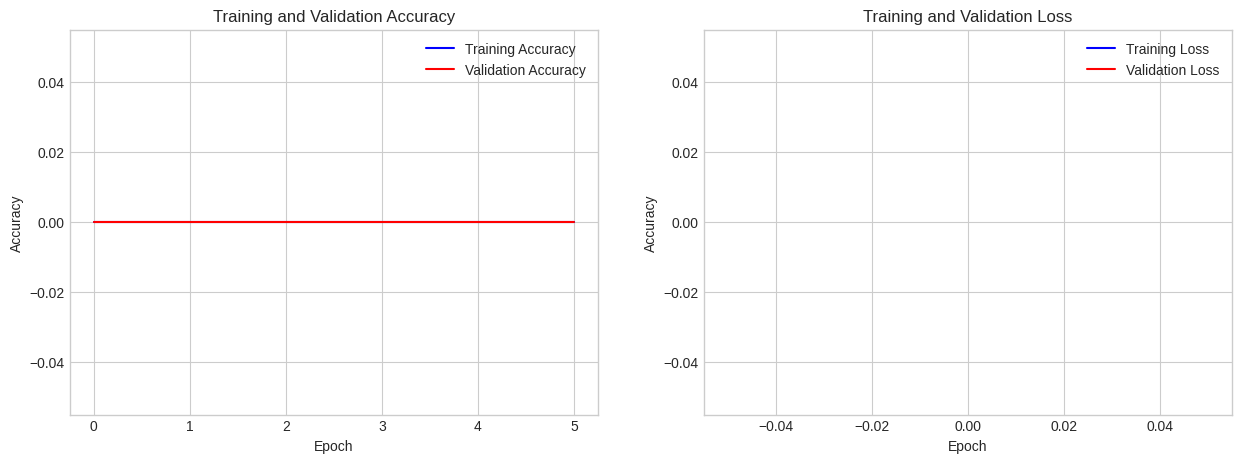

In [ ]:
# Hasil visualisasi
plot_history(history)

In [ ]:
model.load_weights('/content/model_checkpoints/best_model.weights.h5')

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test, verbose=1)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9747 - loss: 0.0961
Test Loss: 0.07264351844787598
Test Accuracy: 0.9796651005744934


In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_padded)
y_pred = (y_pred > 0.5)

# Menghasilkan laporan klasifikasi
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       724
           1       0.94      0.91      0.92       112

    accuracy                           0.98       836
   macro avg       0.96      0.95      0.96       836
weighted avg       0.98      0.98      0.98       836



In [ ]:
no_spam = data_labeling[data_labeling['Label'] == 0]
spam = data_labeling[data_labeling['Label'] == 1]

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

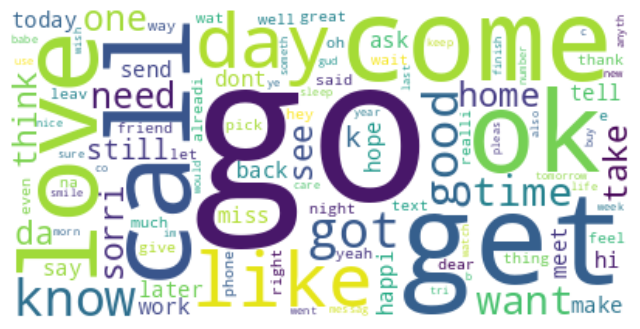

In [ ]:
# Menampilkan 100 kata positif
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
query_words={'#'}
stop_words.update(query_words)

for word in query_words:
    no_spam.Text = no_spam.Text.str.replace(word, '')
from wordcloud import WordCloud, ImageColorGenerator
wc=WordCloud(
    stopwords=stop_words,
    collocations=False,
    max_words=100,
    background_color="white")
wc.generate(' '.join(no_spam.Text))
plt.figure(figsize=(8,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

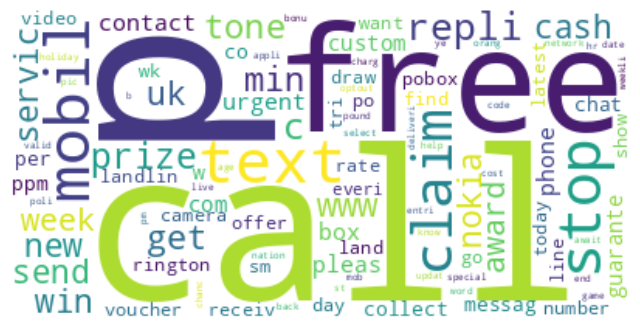

In [ ]:
# Menampilkan 100 kata positif
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
query_words={'#'}
stop_words.update(query_words)

for word in query_words:
    spam.Text = spam.Text.str.replace(word, '')
from wordcloud import WordCloud, ImageColorGenerator
wc=WordCloud(
    stopwords=stop_words,
    collocations=False,
    max_words=100,
    background_color="white")
wc.generate(' '.join(spam.Text))
plt.figure(figsize=(8,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")